In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import os
from astropy.io import fits
from astropy.table import Table
import img_scale
from glob import glob
from astropy.wcs import wcs
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

CO(2-1): $\lambda$ 1.3 mm / 1300 $\mu$m

Band 3 84-116 Ghz /  2600-3600 $\mu$m

In [4]:
2600 / 1300 - 1, 3600 / 1300 - 1

(1.0, 1.7692307692307692)

In [6]:
v4S = Table.read(fits.open('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Eazy/goodss_3dhst.v4.4.zout.fits'),
                 format='fits').to_pandas()

v4Scat = Table.read('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat',
                 format='ascii').to_pandas()

In [7]:
v4S['use'] = v4Scat['use_phot']
v4S['star'] = v4Scat['class_star']

In [10]:
filesS = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/*S*/*/Prep/*full.png')

allSids = [int(os.path.basename(U).replace('.full.png','').split('_')[1]) for U in filesS]

Sids = np.array(list(set(allSids)))

Spresent = [U in Sids for U in v4S.id]

v4S['R2'] = Spresent

In [21]:
fileS_v1 = glob('/Users/vestrada/Data/CLEAR/RELEASE_v1.0.0/COMBINED/1D/FITS/*S*')
allSids_v1 = [int(os.path.basename(U).replace('.1D.fits','').split('_')[1]) for U in fileS_v1]

Sids_v1 = np.array(list(set(allSids_v1)))
Spresent_v1 = [U in Sids_v1 for U in v4S.id]
v4S['R1'] = Spresent_v1

In [32]:
3 < 4 and v4S.R2[0] or v4S.R1[0]

False

[0, 2.5, 0.5, 2.5]

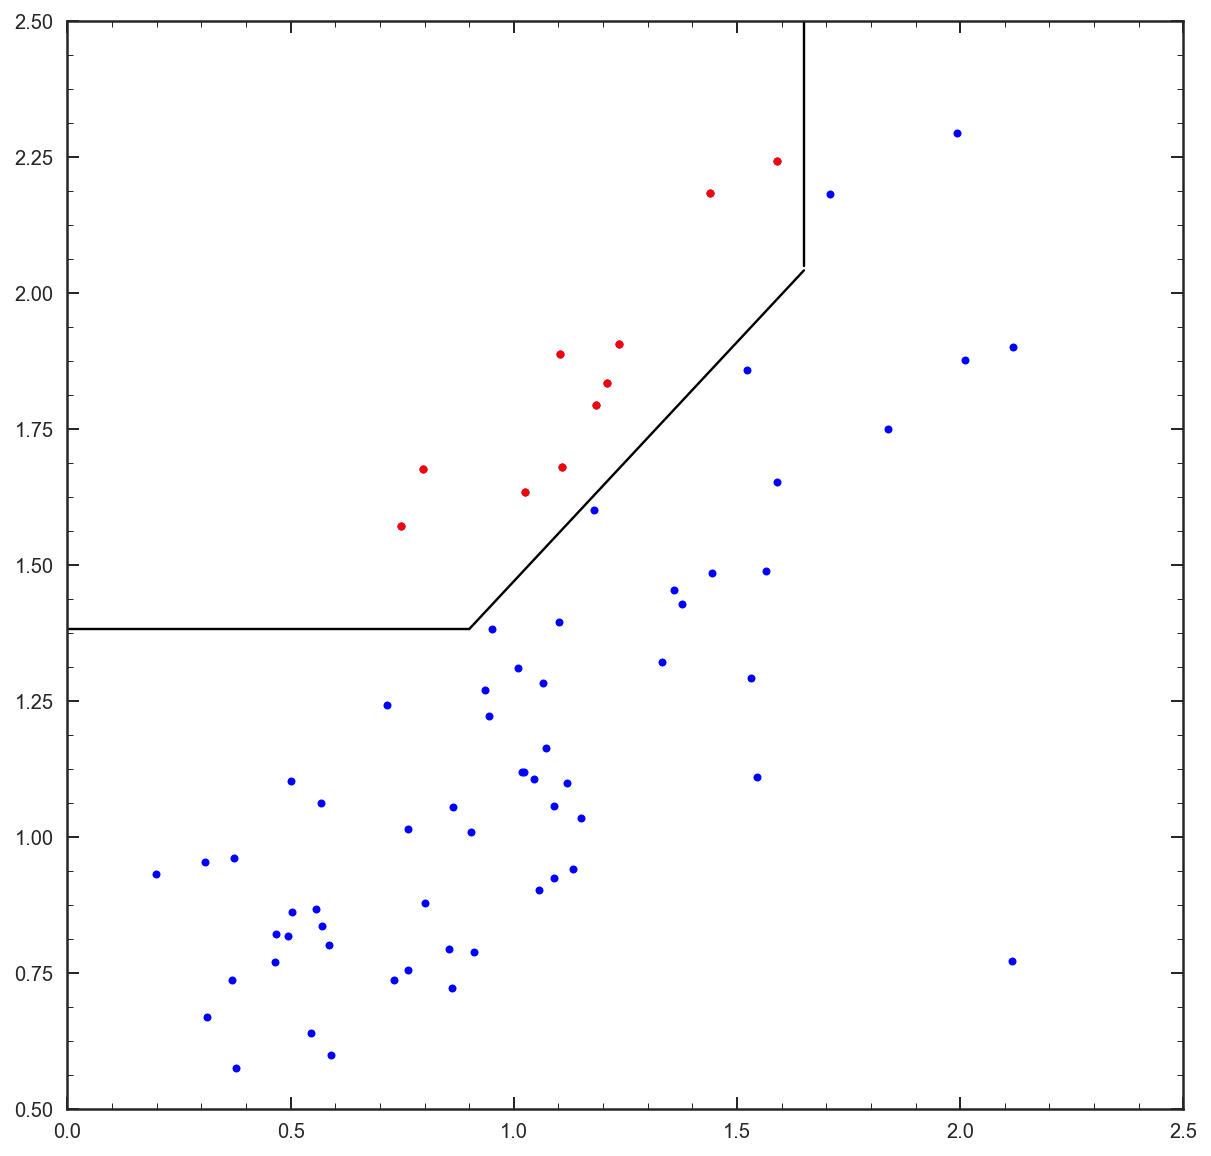

In [43]:
v4S_red = v4S.query('mass > 10**9.8 and 1.5 < z500 < 1.7 and use == 1 and star < 0.8')
v4S_red = v4S_red.query('R2 == True or R1 == True')
def Color(band1, band2):
    m1=-2.5*np.log10(band1)
    m2=-2.5*np.log10(band2)
    return m1-m2

SUV = Color(v4S_red.restU, v4S_red.restV)
SVJ = Color(v4S_red.restV, v4S_red.restJ)

SQ = []
Ssf = []

for i in SUV.index:
    if SUV[i]>=0.88*SVJ[i]+0.59 and SUV[i]>1.382 and SVJ[i]<1.65:
        SQ.append(i)
    else:
        Ssf.append(i)
        
plt.figure(figsize=[10,10])
plt.plot(SVJ, SUV,'bo',ms=4)

plt.plot(SVJ[SQ], SUV[SQ],'ro',ms=4)

plt.plot([0,.9],[1.382,1.382],'k',lw=1.2)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=1.2)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=1.2)
plt.axis([0,2.5,.5,2.5])

In [51]:
SQ_up = np.array([26271, 29256, 38842, 39011, 39363, 40222, 41519, 42112, 42777, 43006, 44041])

In [52]:
len(v4S_red.ra[SQ_up])

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


11

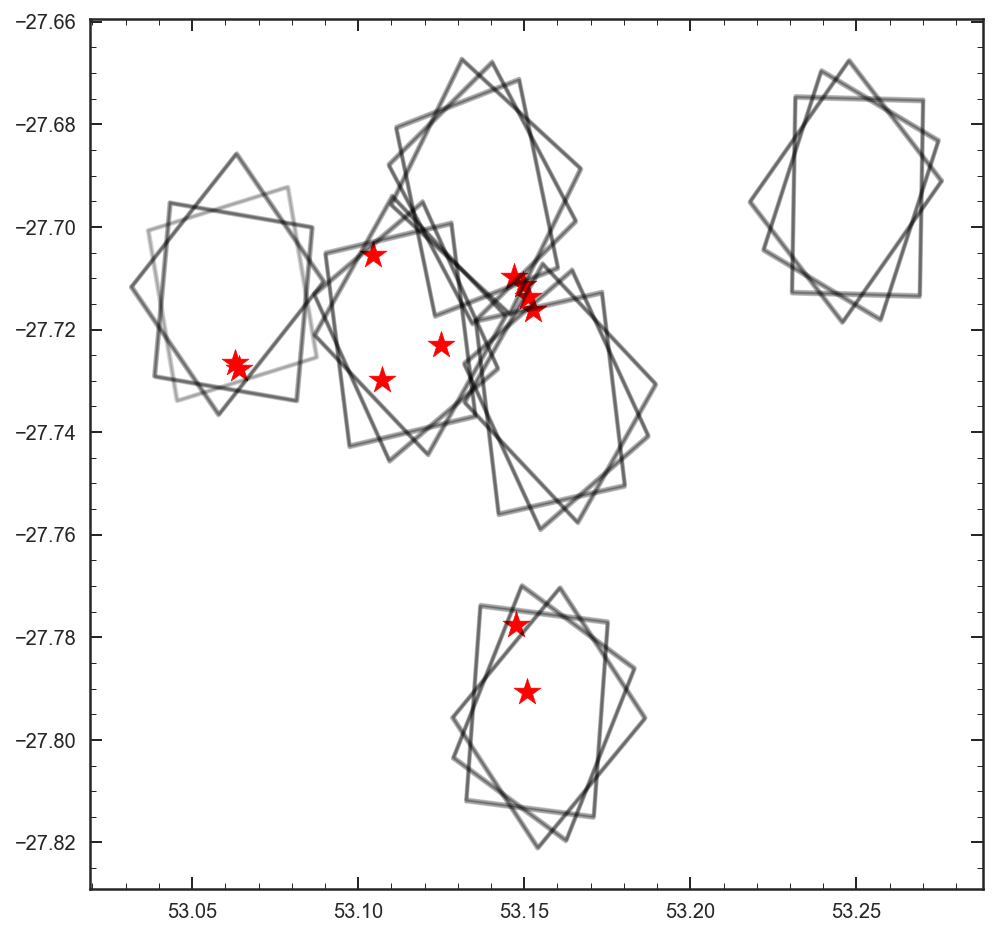

In [62]:
plt.figure(figsize=[8,8])

sflts = glob('/Users/vestrada/Clear_data/s_flt_files/*')

dat = fits.open(sflts[0])

dat[0].header['TARGNAME']

def flt_pos(fn):
    flt=fits.open(fn)
    w = wcs.WCS(flt[1].header)

    xpixlim=len(flt[1].data[0])
    ypixlim=len(flt[1].data)

    pos=w.wcs_pix2world([[0,0],[xpixlim, 0],[xpixlim, ypixlim],[0, ypixlim]],1)
            
    return pos

for i in sflts:
    p1,p2,p3,p4 = flt_pos(i)
    allpos = np.array([p1,p2,p3,p4,p1]).T
    plt.plot(allpos[0],allpos[1], 'k',alpha = 0.1,zorder=1)

plt.scatter(v4S.ra[SQ_up],v4S.dec[SQ_up],marker='*', s=200, color = 'r')

## img pull

In [59]:
seg = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F160W_seg.fits')[0].data
f160 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F160W_orig_sci.fits')[0].data
f140 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F140W_orig_sci.fits')[0].data
f125 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F125W_orig_sci.fits')[0].data
f105 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss-F105W-astrodrizzle-v4.4_drz_sci.fits')[0].data

In [61]:
v4S.id[SQ_up].values

array([26272, 29257, 38843, 39012, 39364, 40223, 41520, 42113, 42778,
       43007, 44042])

img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh


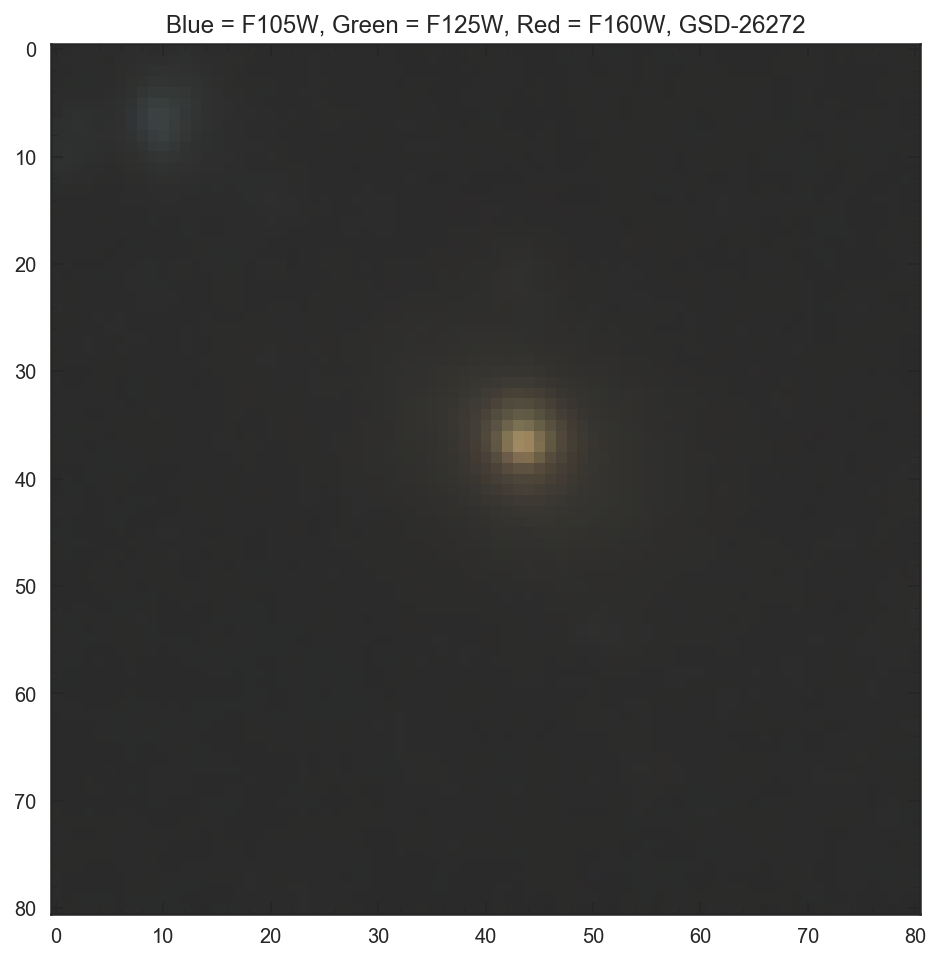

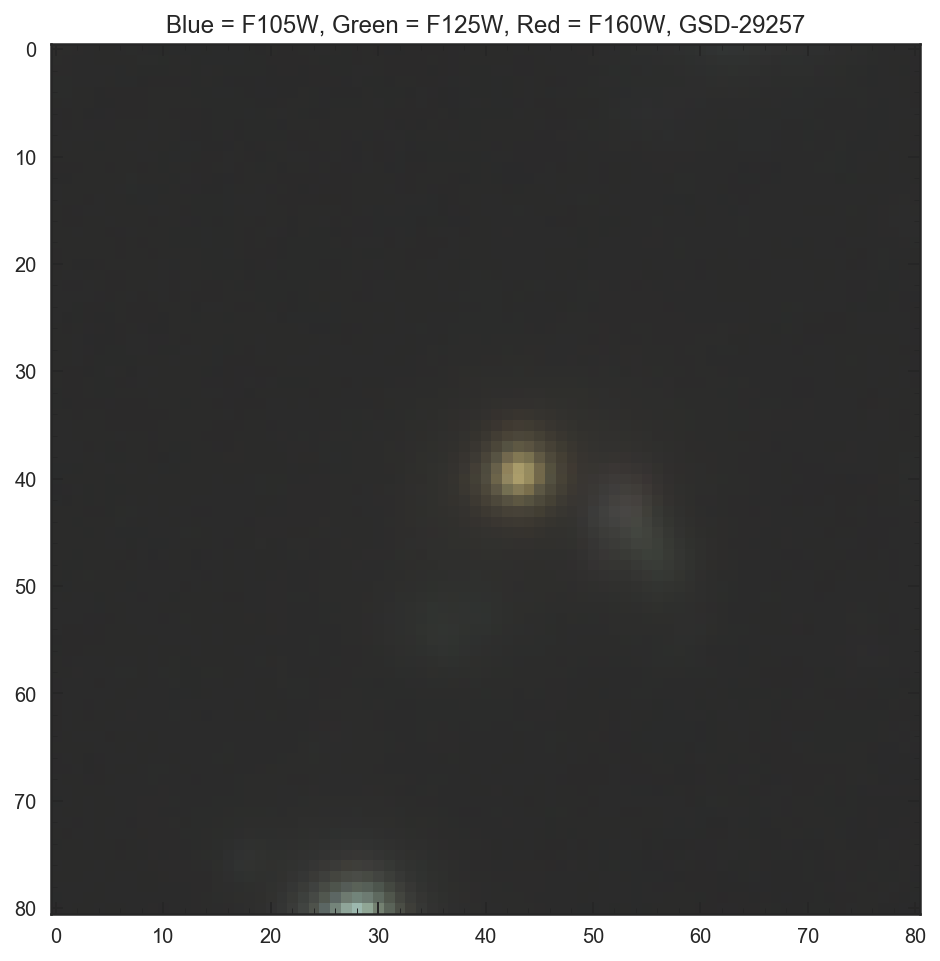

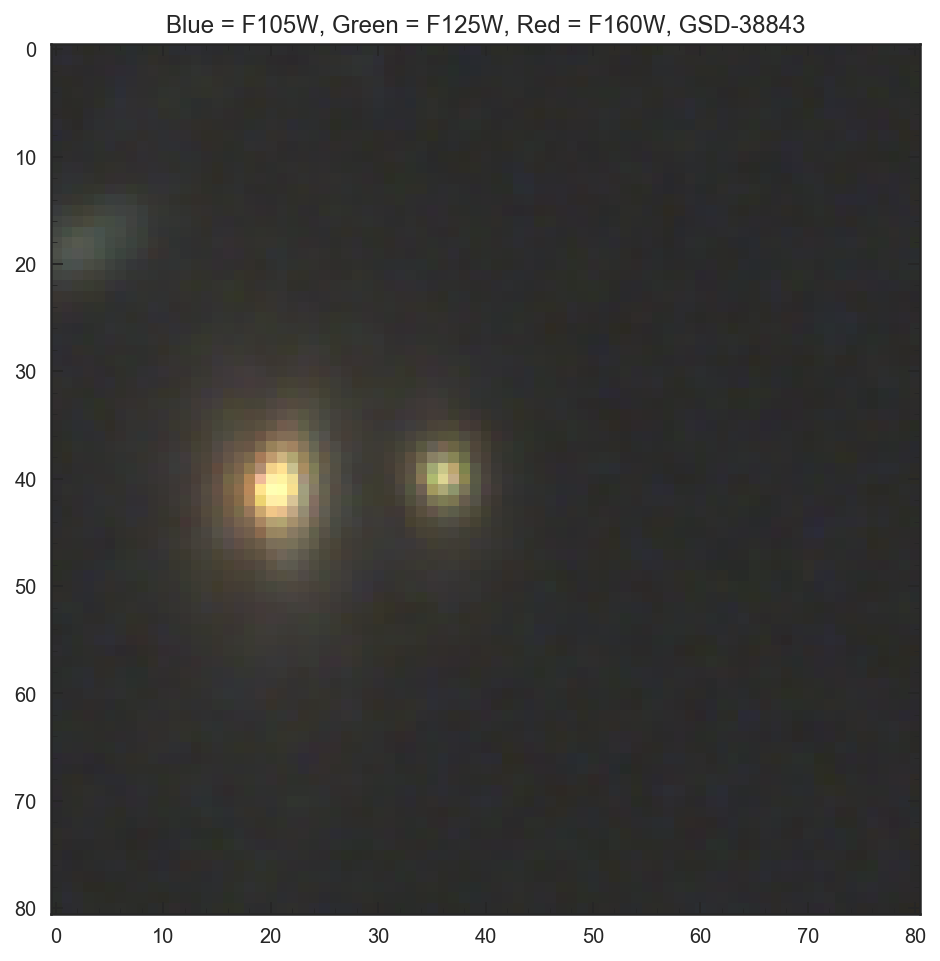

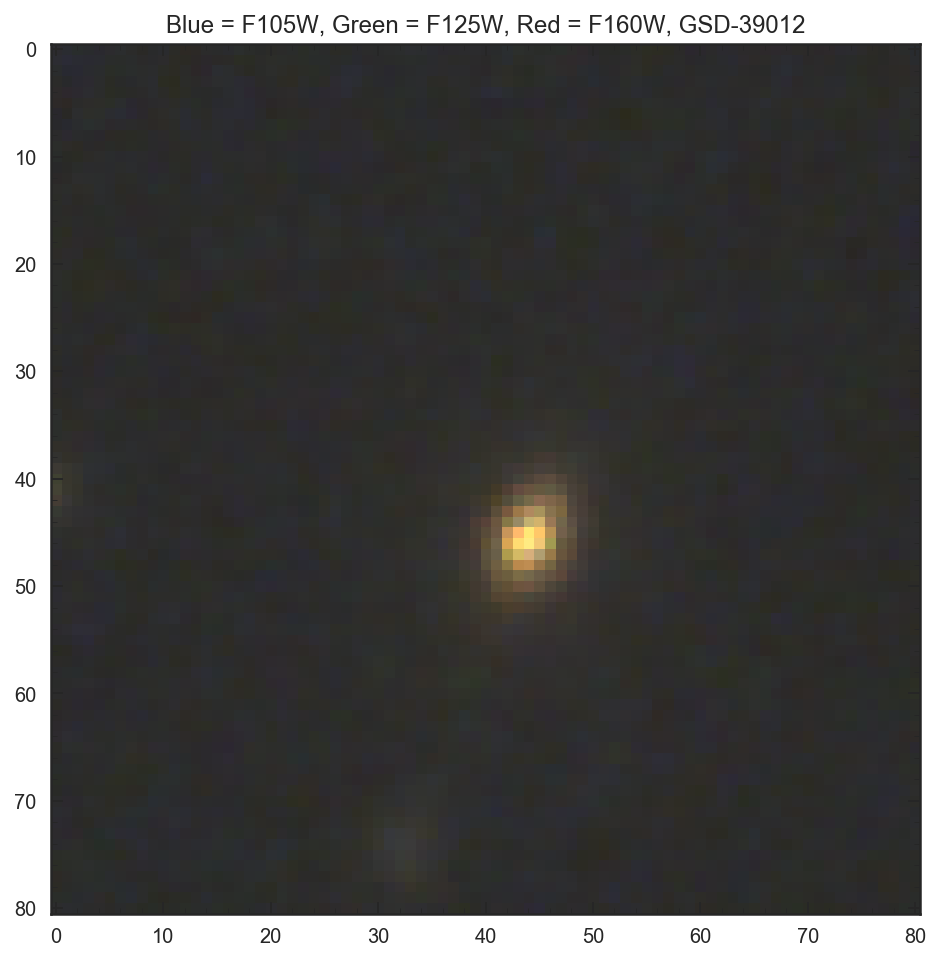

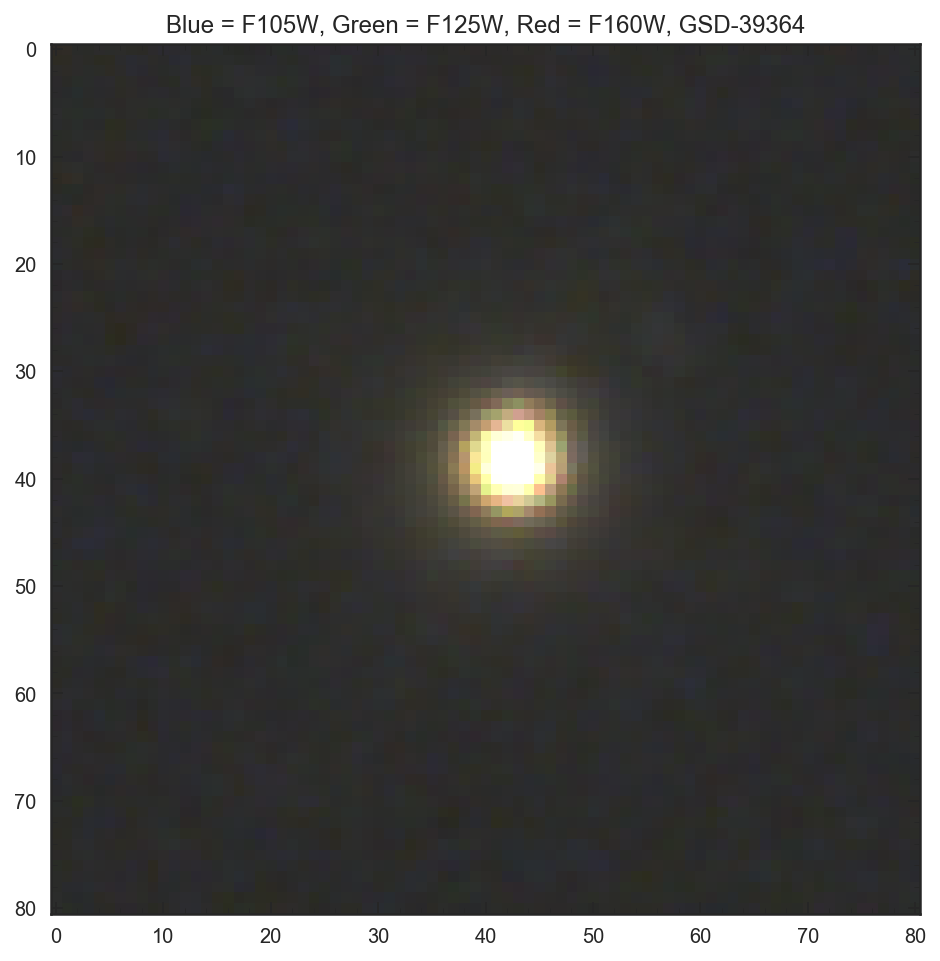

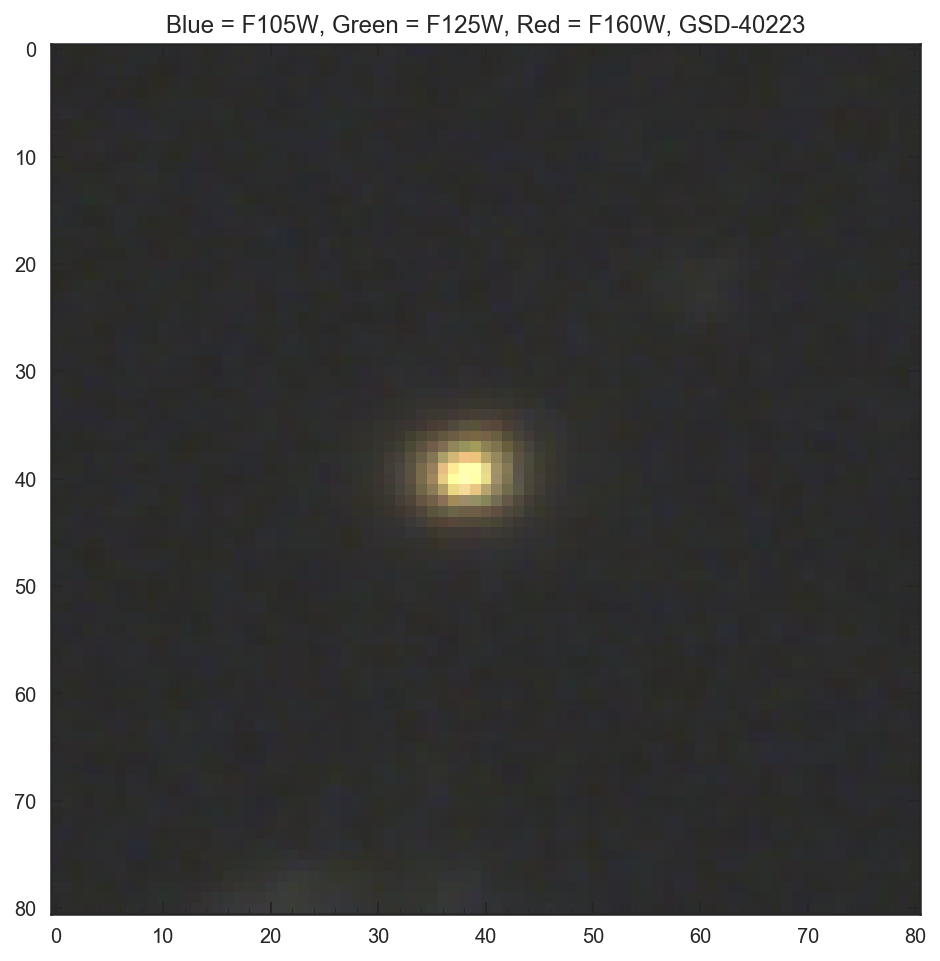

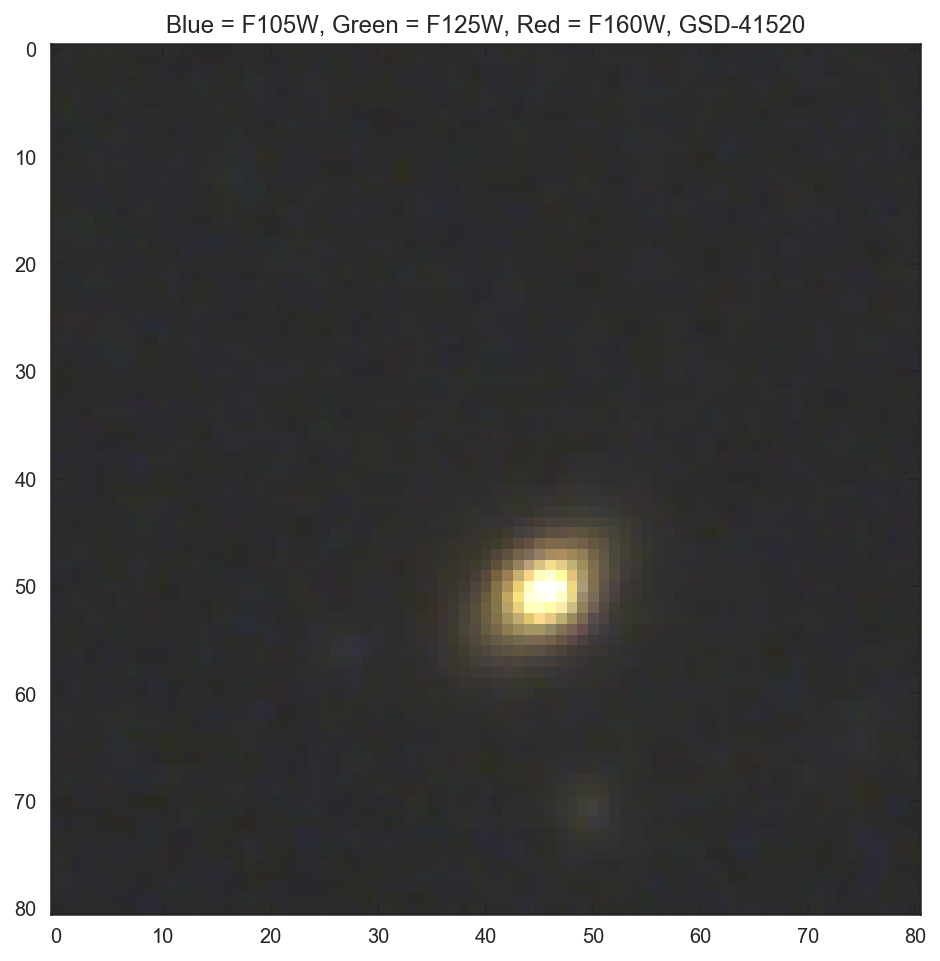

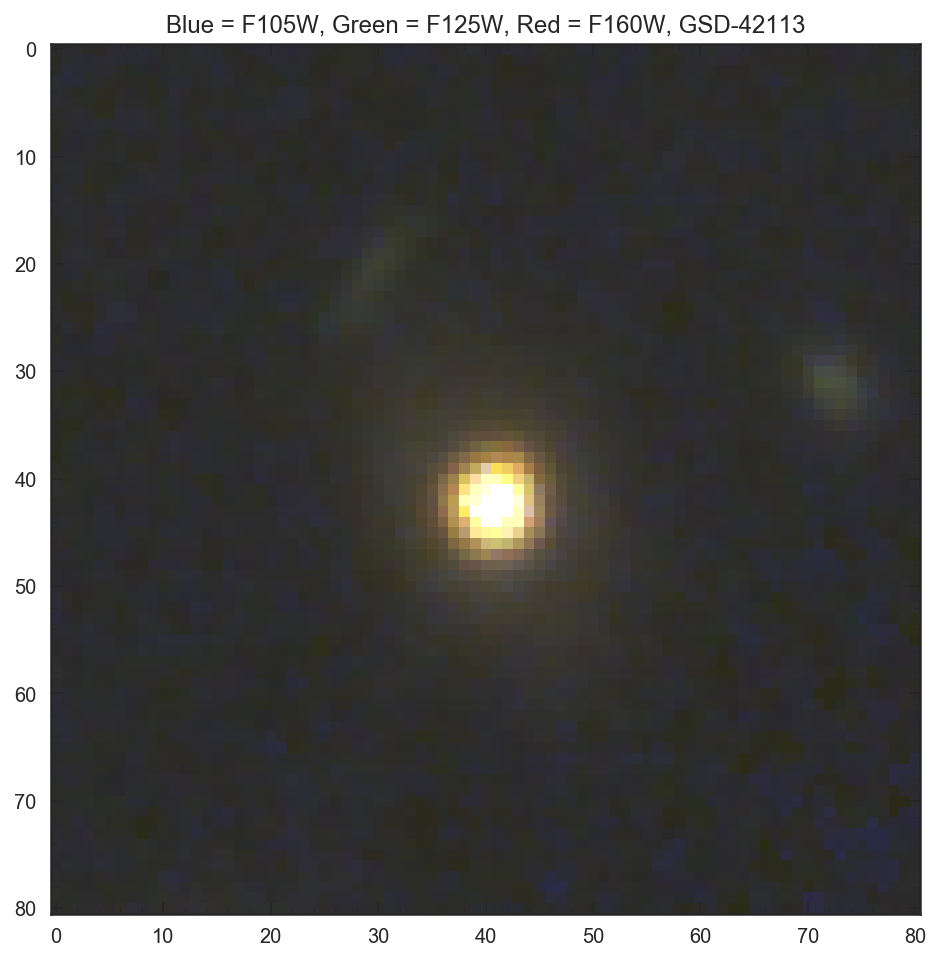

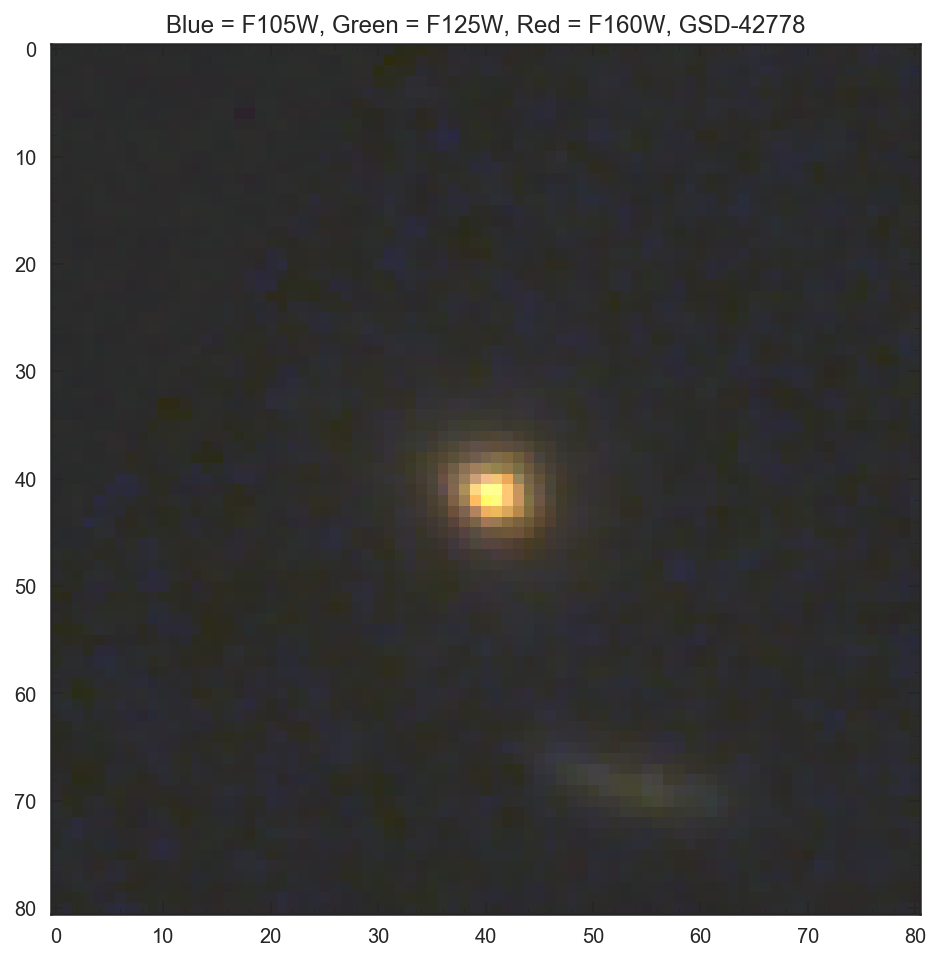

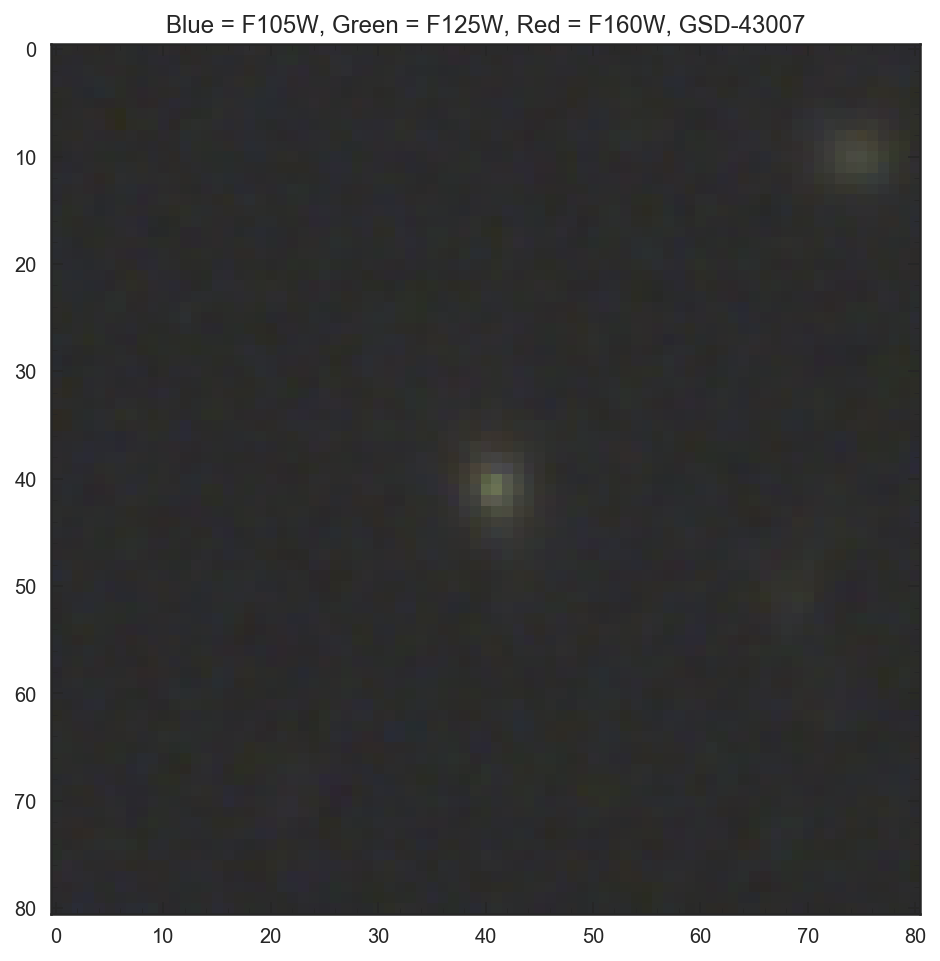

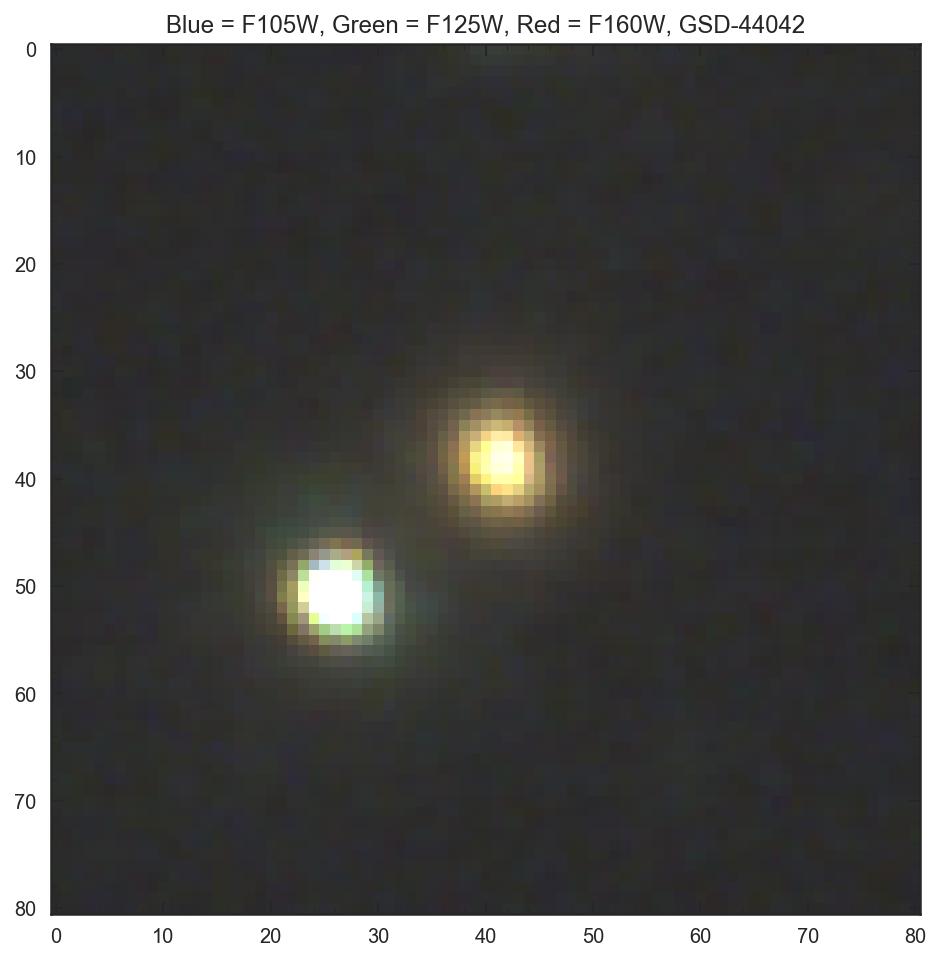

In [64]:
gids = v4S.id[SQ_up].values

for i in gids:
    idx = np.argwhere(seg == i)

    ycnt =int((max(idx.T[0]) + min(idx.T[0])) / 2)
    xcnt = int((max(idx.T[1]) + min(idx.T[1])) / 2)
    
    f105img = f105[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f125img = f125[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f160img = f160[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]

    img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
    img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
    img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
    img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

    plt.figure(figsize=[8,8])
    plt.imshow(img,aspect='equal')
    plt.title('Blue = F105W, Green = F125W, Red = F160W, GSD-{0}'.format(i))

In [71]:
v4S.id[SQ_up]

26271    26272
29256    29257
38842    38843
39011    39012
39363    39364
40222    40223
41519    41520
42112    42113
42777    42778
43006    43007
44041    44042
Name: id, dtype: int64

In [81]:
from spec_extract import Stack

def Extract_phot(catalog, galaxy_id, masterlist = '../phot/master_template_list.pkl'):

    galdf = catalog[catalog.id == galaxy_id]
    master_tmp_df = pd.read_pickle(masterlist)

    pre= 'S_'

    eff_wv = []
    phot_fl = []
    phot_er = []
    phot_num = []

    for i in galdf.keys():
        if i[0:2] == 'f_':
            Clam = 3E18 / master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0] **2 * 10**((-1.1)/2.5-29)
            if galdf[i].values[0] > -99.0:
                eff_wv.append(master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0])
                phot_fl.append(galdf[i].values[0]*Clam)
                phot_num.append(master_tmp_df.tmp_num[master_tmp_df.tmp_name == pre + i].values[0])
        if i[0:2] == 'e_':
            if galdf[i].values[0] > -99.0:
                phot_er.append(galdf[i].values[0]*Clam)

    return eff_wv,phot_fl,phot_er,phot_num


def Extract_spec_R2(galaxy_id):
    spec_list = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/*S*/*/Prep/*{0}*1D.fits'.format(galaxy_id))

    Bwv, Bfl, Ber, Bft, Bln, Bct = [[],[],[],[],[],[]]

    Rwv, Rfl, Rer, Rft, Rln, Rct = [[],[],[],[],[],[]]

    for i in range(len(spec_list)):
        dat = fits.open(spec_list[i])

        try:
            Bwv.append(np.array(dat['G102'].data['wave']).T)
            Bfl.append(np.array(dat['G102'].data['flux']).T)
            Ber.append(np.array(dat['G102'].data['err']).T)
            Bft.append(np.array(dat['G102'].data['flat']).T)
            Bln.append(np.array(dat['G102'].data['line']).T)
            Bct.append(np.array(dat['G102'].data['cont']).T)

        except:
            print('no g102')

        try:
            Rwv.append(np.array(dat['G141'].data['wave']).T)
            Rfl.append(np.array(dat['G141'].data['flux']).T)
            Rer.append(np.array(dat['G141'].data['err']).T)
            Rft.append(np.array(dat['G141'].data['flat']).T)
            Rln.append(np.array(dat['G141'].data['line']).T)
            Rct.append(np.array(dat['G141'].data['cont']).T)

        except:
            print('no g141')

    if len(Bwv) > 0:                
        SBW, SBF, SBE, SBT, SBL, SBC = Stack(Bwv, Bfl, Ber, Bft, Bln, Bct)
#         np.save('../spec_files/{0}_{1}_g102'.format(self.field, self.galaxy_id),[SBW, SBF, SBE, SBT, SBL, SBC])


    if len(Rwv) > 0:     
        SRW, SRF, SRE, SRT, SRL, SRC = Stack(Rwv, Rfl, Rer, Rft, Rln, Rct)
#         np.save('../spec_files/{0}_{1}_g141'.format(self.field, self.galaxy_id),[SRW, SRF, SRE, SRT, SRL, SRC])

    try:
        return SBW, SBF / SBT, SBE / SBT, SRW, SRF / SRT, SRE / SRT
    except:
        return SBW, SBF / SBT, SBE / SBT
        



def Extract_spec_R1():
#     spec_list = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/*S*/*/Prep/*{0}*1D.fits'.format(galaxy_id))

    Bwv, Bfl, Ber, Bft, Bln, Bct = [[],[],[],[],[],[]]


    for i in range(len(spec_list)):
        dat = fits.open(spec_list[i])

            Bwv.append(np.array(dat['G102'].data['wave']).T)
            Bfl.append(np.array(dat['G102'].data['flux']).T)
            Ber.append(np.array(dat['G102'].data['err']).T)
            Bft.append(np.array(dat['G102'].data['flat']).T)
            Bln.append(np.array(dat['G102'].data['line']).T)
            Bct.append(np.array(dat['G102'].data['cont']).T)


    SBW, SBF, SBE, SBT, SBL, SBC = Stack(Bwv, Bfl, Ber, Bft, Bln, Bct)
#         np.save('../spec_files/{0}_{1}_g102'.format(self.field, self.galaxy_id),[SBW, SBF, SBE, SBT, SBL, SBC])

    return SBW, SBF / SBT, SBE / SBT

In [86]:
spec_list = glob('/Volumes/Vince_research/Data/CLEAR/RELEASE_v1.0.0/COMBINED/1D/FITS/*S*41520*')

In [88]:
dat = fits.open(spec_list[0])

In [91]:
dat[1].data

FITS_rec([( 7453.07446166, -1.19268575e-02, 0.01554181, 0.00937301,  5.68848971e-04, 0.00334475, 4.15419804e-04),
          ( 7465.27610548,  4.04568006e-03, 0.01213053, 0.00778356, -4.94588493e-04, 0.00269542, 9.58480491e-04),
          ( 7477.4777493 , -1.81999093e-02, 0.01295524, 0.00829461, -3.40456700e-03, 0.00297005, 1.10120681e-03),
          ( 7489.67939312, -7.19408578e-04, 0.01197042, 0.00783579,  1.86326696e-03, 0.00261924, 1.18209318e-03),
          ( 7501.88103694, -6.29595539e-03, 0.01266083, 0.00817911, -5.30934935e-03, 0.0027611 , 1.39480027e-03),
          ( 7514.08268076, -1.94067338e-02, 0.01165467, 0.00753508,  4.15432346e-04, 0.00262256, 1.66750873e-03),
          ( 7526.28432458, -4.10864815e-03, 0.01228414, 0.00771522,  5.80099087e-03, 0.00283804, 1.95617108e-03),
          ( 7538.4859684 ,  2.88438775e-03, 0.0115479 , 0.00750102,  2.69204016e-03, 0.00260206, 2.32689922e-03),
          ( 7550.68761223,  1.06371726e-02, 0.01202578, 0.00750103,  2.94370269e-03, 0.0

In [84]:
Pwv,Pfl,Per,num = Extract_phot(v4Scat, 38843)
Bwv, Bfl, Ber, Rwv, Rfl, Rer = Extract_spec_R2(38843)

/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

<ErrorbarContainer object of 3 artists>

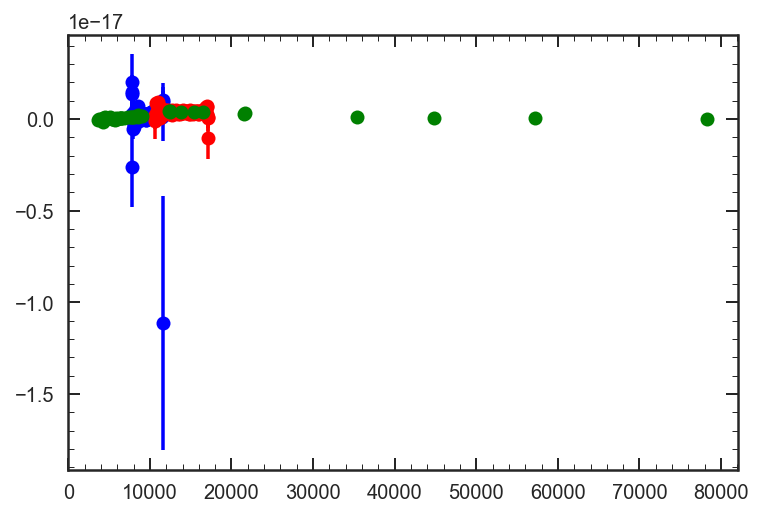

In [85]:
plt.errorbar(Bwv,Bfl,Ber, fmt = 'o', color = 'b')
plt.errorbar(Rwv,Rfl,Rer, fmt = 'o', color = 'r')
plt.errorbar(Pwv,Pfl,Per, fmt = 'o', color = 'g')